In [ ]:
# install QuTip Library (Quantum Toolbox in Python), Documentation: https://qutip.org/docs/latest/
pip install qutip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.7 MB 3.1 MB/s 


In [ ]:
import qutip as qt
import numpy as np

In [ ]:
from qutip import *
from numpy import *

In [ ]:
v = 0.5 #constant intracell hopping (unmodulated hopping amplitude)

omega = 1.0 * 2*pi #Here I fixed Omega 

H0 = v * sigmax() #time independent part of Hamiltonian
n = 10 #number of momentum values
k = np.linspace(- pi, pi, n) #crystal momementum
T = 2*np.pi / omega #periodicity

In [ ]:
H1 = dict() #time dependent part of Hamiltonian for different k's
quasi_energies = np.zeros((n, 2))
for i in range(n):
  k_i = k[i]
  H1[i] = sin(k_i)*sigmay() + cos(k_i)*sigmax()
  args = {'w': omega}
  H = [H0, [H1[i], 'sin(w * t)']]  # I chose the hopping modulation to be a sin function of time 
  f_modes_0, f_energies = floquet_modes(H, T, args) # from QuTip Library for finding quasi energies and floquet modes
  quasi_energies[i,:] = f_energies 

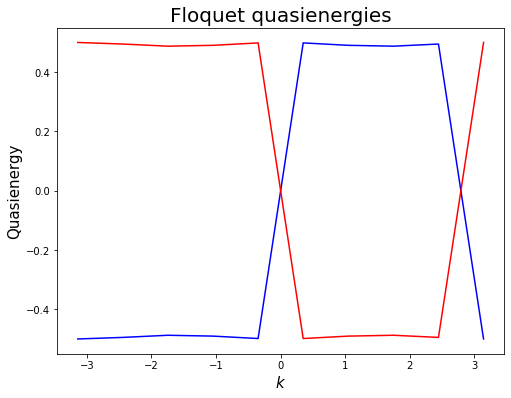

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(k, quasi_energies[:,0], 'b', k, quasi_energies[:,1], 'r') 
plt.xlabel(r'$k$',fontsize = 15) 
plt.ylabel(r'Quasienergy',fontsize = 15) 
plt.title(r'Floquet quasienergies',fontsize = 20) 
plt.show() 

In [ ]:
# Quasienergy values for each mode (s = 1 or s = -1)

In [ ]:
quasi_energies[:,1]

array([ 0.49999991,  0.49470699,  0.48749168,  0.49035279,  0.49850781,
       -0.49850781, -0.49035279, -0.48749168, -0.49470699,  0.49999991])

In [ ]:
quasi_energies[:,0]

array([-0.49999991, -0.49470699, -0.48749168, -0.49035279, -0.49850781,
        0.49850781,  0.49035279,  0.48749168,  0.49470699, -0.49999991])